This tutorial is from http://gpss.cc/gpss13/assets/lab1.pdf, https://nbviewer.jupyter.org/github/SheffieldML/notebook/blob/master/GPy/index.ipynb

**GP는 함수에 대한 prior를 정의합니다.** 이 prior는 관측된 데이터를 통해 posterior로 변환 할 수 있습니다.
함수에 대한 분포를 정의하는 것이 어려워 보일 수 있습니다. 
**하지만 저희가 해야할 것은 우리는 단지 "유한"하지만 "임의의 점" 집합에서 함수의 값에 대한 distribution을 정의하는 것입니다.**

<font color=red>why? how?</font>
**GP는 이 임의의 유한한 함수값들이 joint Gaussian distribution(mean function과 covariance function으로 정의된)을 따른다고 가정하기 때문입니다.**

<font color=red>**Definition : A Gaussian process is a collection of random variables, any finite number of which have a joint Gaussian distribution.**</font>



<img src="./img/basic1.PNG" alt="various_kernel" title="various_kernel" />

이해하기 힘드실 수 있으니 무한한 점에서 벗어나 2개의 점을 예시로 들어보겠습니다.
만약 위와 같이 **x1과 x2가 특정한 joint distribution을 따른다고 가정한다면?(GP의 가정)**

x1을 관측한 값, x2를 아직 관찰하지 못한 값이라고 했을 때, 이 joint distribution을 통하여 이론 수업때 배운것과 같이 conditional probability를 계산할 수 있게 됩니다. 따라서 prior와 이 observation을 통하여 posterior까지 구할 수 있게 됩니다.


<img src="./img/basic2.PNG" alt="various_kernel" title="various_kernel" />

그럼 다시 무한한 점, 함수로 돌아와보겠습니다.
우리의 GP의 가정에 따라 몇몇 관찰된 아웃풋 f 와 그렇지 않은 점들 f* 는 위와 같이  joint Gaussian distribution을 따릅니다.
그렇다면 관측된 f 로부터 conditional distribution을 구할 수 있고, 따라서 
f(observation)와 prior로 부터 f* 의 posterior까지 계산할 수 있게 됩니다.

이 때 K 는 수업시간에 배운 kernel function을 observe 된 x value에 적용하여 observe x_value 끼리의 관계를 나타내는 matrix 입니다. K* 는 observe 된 x와 observe 되지 않은 x 에 kernel function을 적용한 것이고, K** 는 observe 되지 않은 x value에 kernel function을 적용한 것입니다.

mean을 고려 후에, GP모델은 covariance function(kernel)에 의해 결정됩니다. kernel은 모델이 어떻게 generalize를 할지, 새로운 데이터를 추정할지 결정합니다. covariance function으로 사용할 수 있는 함수는 다양합니다(이론수업 참조)

**covaraince function 을 통해서 observe 된 점들과 가까운 점엔 높은 confidence를, 먼 점엔 낮은 confidence 를 갖게 됩니다.(아래의 회색부분이 confidence 95% 를 나타낸 것)**

<img src="./img/prior,posterior.PNG" alt="various_kernel" title="various_kernel" />

# Gaussian Process Tutorial Code

In [1]:
%matplotlib inline
import GPy
import numpy as np
import matplotlib.pyplot as plt

# 1. Getting started : the covariace function

우리에게 익숙한 Gaussian distribution은 mean vector와 variance matrix로부터 정의가 됩니다. 이를 일반화하여 생각하면 확장된 개념을 생각해볼 수 있습니다. Gaussian Process는 mean function  과 covariance 함수로부터 정의됩니다. 따라서 Gussian distribution은 벡터들에서 놀지만 Gaussian processs는 함수들에서 놀고 있습니다. 이러한 Gaussian process는 아래와 같이 표현됩니다.

\begin{align}
\ {f} &∼GP(m(x),k(x,x')) \\
\end{align}


중요한 커널(covariance function)부터 시작해보겠습니다.
이 이론실습에서는 RBF 커널을 중심으로 실습을 하겠습니다.

In [2]:
d = 1 # input dimension
var = 1. # variance
theta = 0.2 # lengthscale
k = GPy.kern.RBF(d,var,theta)

A summary of the kernel can be obtained using the command <font color=blue> print (k)</font>

In [3]:
print (k)

  rbf.         |  value  |  constraints  |  priors
  variance     |    1.0  |      +ve      |        
  lengthscale  |    0.2  |      +ve      |        


It is also possible to plot the kernel as a function of one of its inputs (whilst fixing the other) with <font color=blue> k.plot()</font> .

{'covariance': [[<matplotlib.lines.Line2D at 0x7f91cd8390d0>]]}

 /usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


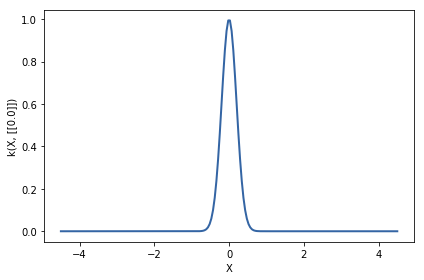

In [4]:
k.plot(x=0)

## <font color=green>*TRY!</font>
### To get an insight on the effect of the parameters their shape, try
#### <font color=green>1. Change the lengthscale of RBF kernel and plot!</font>
The value of the kernel parameters can be accessed and modified using <font color =blue>k['.*lengthscale']</font> . 

{'covariance': [[<matplotlib.lines.Line2D at 0x7f91cb6ea0d0>]]}

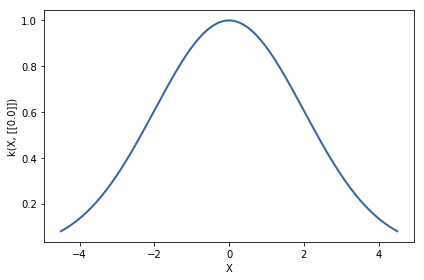

In [7]:
# TRY in here!
k['.*lengthscale'] =2
k.plot()

## <font color=red> Question 1</font>
<font color=red>1.What is the effect of the lengthscale parameter ?</font>
Lengthscale describes how smooth a function is. Small lengthscale value means that function values can change quickly, large values characterize functions that change only slowly. Lengthscale also determines how far we can reliably extrapolate from the training data.
<font color=red>2.Similarly, change the previous bit of code to see the influence of the variance parameter</font>

#### <font color=green>2. Change the kernel (ex. exponential, linear, periodic exponential) and plot!</font>
hint1 :  <font color =blue> "GPy.kern.then tab button" </font> will show you several kernel to use. 

{'covariance': [[<matplotlib.lines.Line2D at 0x7f91cb4f8e50>]]}

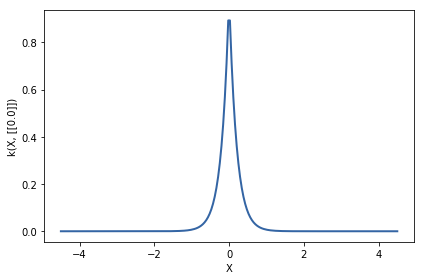

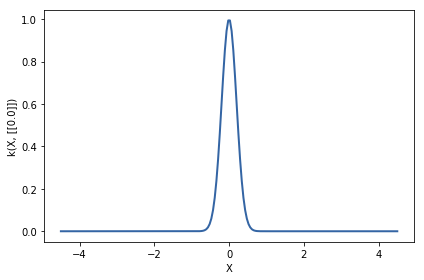

In [11]:
# TRY in here!

k1 = GPy.kern.Exponential(d,var,theta)
k1.plot()

k2 = GPy.kern.RBF(d,var,theta)
k2.plot()

If you plot several kernel, it will be like this!

<img src="./img/various_kernel.PNG" alt="various_kernel" title="various_kernel" />

## Operations to combine kernels

You can combine several kernels also with operation ( * or + etc)

## <font color=green>*TRY!</font>

#### <font color=green onmouseover="aa">1. use * operation with 2 kernels and plot product of kernels</font>
hint : <a href="https://github.com/upstage/" title="k1 * k2 will work">MouseOver</a>
answer : <a href="https://github.com/upstage/" title="# Product of kernels
k1 = GPy.kern.RBF(1,1.,2.)
k2 = GPy.kern.Matern32(1, 0.5, 0.2)
k_prod = k1 *k2
display(k_prod)
k_prod.plot()">MouseOver</a>

mul.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,2.0,+ve,
Mat32.variance,0.5,+ve,
Mat32.lengthscale,0.2,+ve,


{'covariance': [[<matplotlib.lines.Line2D at 0x7f91cb534190>]]}

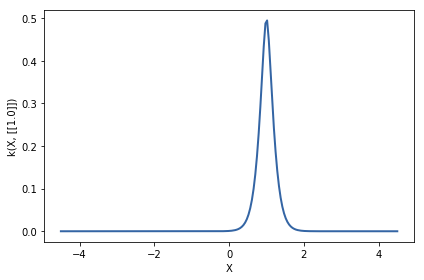

In [14]:
# Try in here!

k1=GPy.kern.RBF(1,1,2)
k2=GPy.kern.Matern32(1,0.5,0.2)
k_prod = k1*k2

display(k_prod)
k_prod.plot()

#### <font color=green onmouseover="aa">2. use + operation with 2 kernels and plot product of kernels</font>
hint : <a href="https://github.com/upstage/" title="k1 + k2 will work">MouseOver</a>
answer : <a href="https://github.com/upstage/" title="# Sum of kernels
k1 = GPy.kern.RBF(1,1.,2.)
k2 = GPy.kern.Matern32(1, 0.5, 0.2)
k_add = k1 + k2
display(k_add)
k_add.plot()">MouseOver</a>

sum.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,2.0,+ve,
Mat32.variance,0.5,+ve,
Mat32.lengthscale,0.2,+ve,


{'covariance': [[<matplotlib.lines.Line2D at 0x7f91cb5cc650>]]}

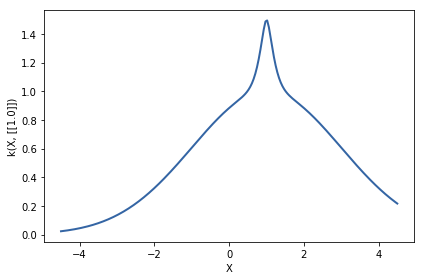

In [15]:
# Try in here!

k1=GPy.kern.RBF(1,1,2)
k2=GPy.kern.Matern32(1,0.5,0.2)
k_add = k1+k2

display(k_add)
k_add.plot()


# See the influence of parameter

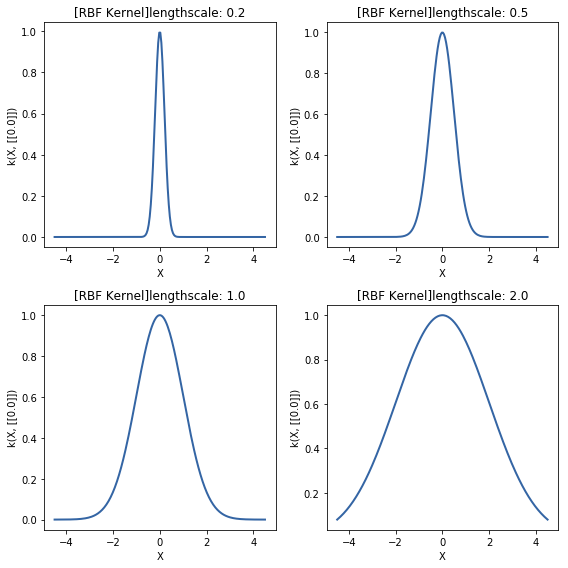

In [16]:
k = GPy.kern.RBF(d) # By default, the parameters are set to 1.
theta = np.asarray([0.2,0.5,1.,2.])

figure, axes = plt.subplots(2,2, figsize=(8,8), tight_layout=True)

for t,a in zip(theta,axes.flatten()):
    k['.*lengthscale']=t
    k.plot(x=0,ax =a, title = "[RBF Kernel]lengthscale: "+str(t) )

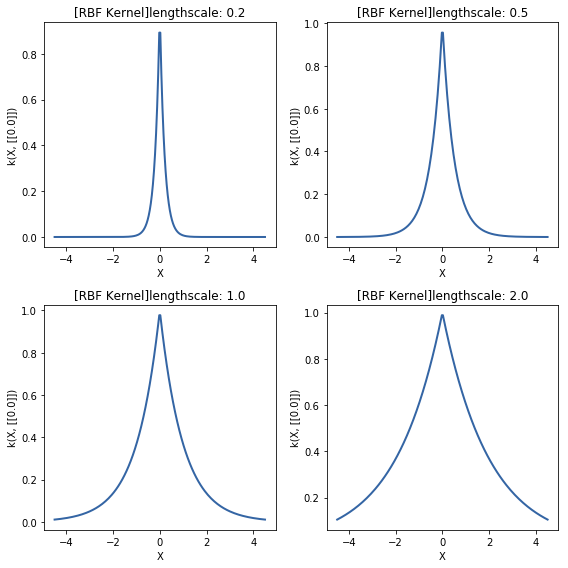

In [17]:
k = GPy.kern.Exponential(d) # By default, the parameters are set to 1.
theta = np.asarray([0.2,0.5,1.,2.])

figure, axes = plt.subplots(2,2, figsize=(8,8), tight_layout=True)

for t,a in zip(theta,axes.flatten()):
    k['.*lengthscale']=t
    k.plot(x=0,ax =a, title = "[RBF Kernel]lengthscale: "+str(t) )

<img src="./img/lengthscale.PNG" alt="various_kernel" title="various_kernel" />

# 2. Sample paths from a Gaussian Process

Represents our belief about the function distribution, which we pass through parameters.
This will be priors defined by GP

### Define Priors with GP using RBF kernel

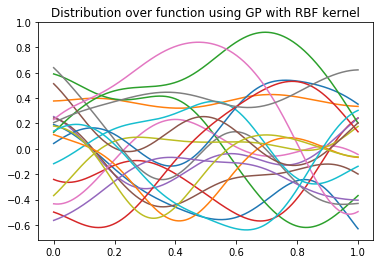

In [18]:
np.random.seed(1) #난수 생성기 초기화 함수,

k = GPy.kern.RBF(input_dim=1,lengthscale=0.2,variance=0.1)

X_ = np.linspace(0.,1.,500) # 500 points evenly spaced over [0,1]
X_ = X_[:,None] # reshape X to make it n*D
mu = np.zeros((500)) # vector of the means
C = k.K(X_,X_) # covariance matrix

# Generate 20 sample path with mean mu and covariance C
Y_samples = np.random.multivariate_normal(mu,C,20)

plt.title("Distribution over function using GP with RBF kernel")
for i in range(20):
    plt.plot(X_[:],Y_samples[i,:])

The sample paths are from our prior to function distribution.

### Distribution changes in presence of Observed data.

We will now see how to create a GP regression model with GPy.
We consider the toy function f(x) = − cos(πx) + sin(4πx) over [0, 1]
and we assume we have the following
observations 


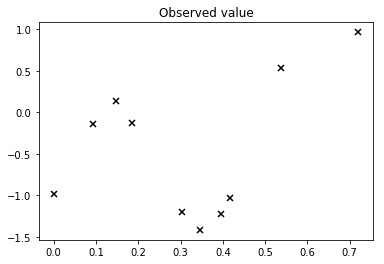

In [19]:
# generate observed data
np.random.seed(1) #난수 생성기 초기화 함수,
X = np.random.uniform(0.,1.,10)[:,None]
Y = -np.cos(np.pi*X) +np.sin(4*np.pi*X) + np.random.randn(10,1)*0.05

plt.figure()
plt.title("Observed value")
plt.plot(X[:,:1],Y,'kx',mew=1.5)

We have observed 10 values. Now what? Then we need to get posterior from this observation and priors!
and then see the samples function from calculated posterior.

In [20]:
m = GPy.models.GPRegression(X,Y,k)
mu,C =m.predict(X_,full_cov=True)

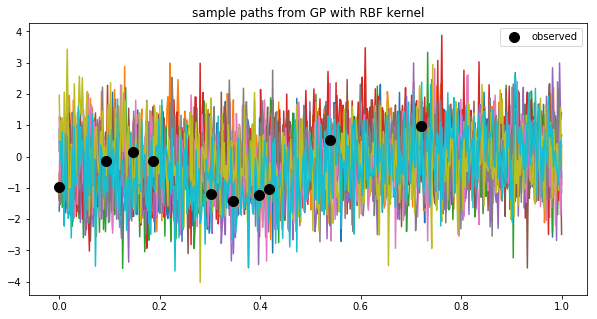

In [21]:
Y_samples = np.random.multivariate_normal(mu.flatten(),C,15)
fig = plt.figure(figsize=(10,5))
plt.title("sample paths from GP with RBF kernel")
for i in range(10):
    plt.plot(X_[:],Y_samples[i,:])
plt.scatter(X,Y, color = "black",s=100,zorder=15,label="observed")
plt.legend()

kernel의 hyper-parameter가 optimize가 안되었는지 observed 근처 지점에서 높은 confidence가 보이지 않습니다. 현재 모델의 상태를 한번 확인해볼까요?

GP_regression.,value,constraints,priors
rbf.variance,0.1,+ve,
rbf.lengthscale,0.2,+ve,
Gaussian_noise.variance,1.0,+ve,


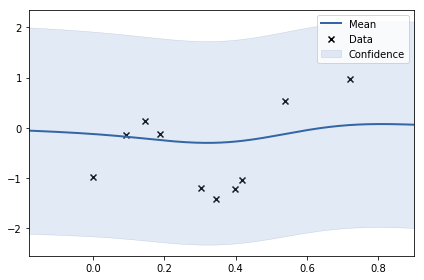

In [22]:
m.plot()
display(m)

hyper parameter를 optimize하기 전의 GP regression model을 보여줍니다. 색칠된 곳은 ~95% confidence interval입니다. Observed 된 데이터포인트 주변으로 confidence가 높을것으로 예상했던 것과 달리 큰 차이를 보이지 않습니다. 커널의 hyper-parameter가 이 데이터에는 맞지 않았나 봅니다. 따라서 커널 optimize 함수를 통하여 hyper-parameter를 optimize하면 모델이 어떻게 변화하는지 보겠습니다.

강의에서 봤듯이, 최적의 파라미터는 <font color=red>observation의 likelihood를 maximizing하는 값</font>으로 추정합니다. 이 optimization을 실행하기 전에 우리는 variance 중에 하나라도 negative가 되는걸 원치 않기 때문에 모든 파라미터가 positive가 되도록 constrain을 주어야합니다. "m.constrain_positive('')"

GP_regression.,value,constraints,priors
rbf.variance,1.1335084026577058,+ve,
rbf.lengthscale,0.14511968819117468,+ve,
Gaussian_noise.variance,0.002650156189726439,+ve,


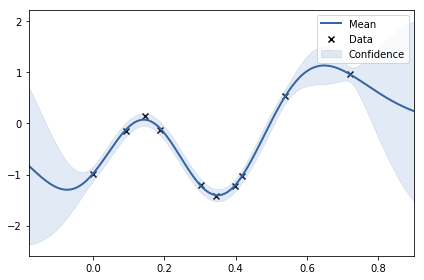

In [23]:
m.constrain_positive('')
m.optimize()
m.plot()
display(m)

In [24]:
mu,C =m.predict(X_,full_cov=True)

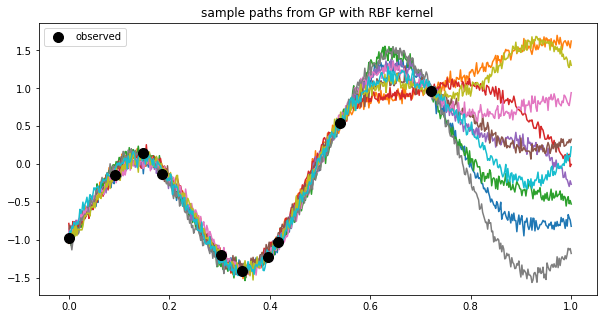

In [25]:
Y_samples = np.random.multivariate_normal(mu.flatten(),C,10)
fig = plt.figure(figsize=(10,5))
plt.title("sample paths from GP with RBF kernel")
for i in range(10):
    plt.plot(X_[:],Y_samples[i,:])
plt.scatter(X,Y, color = "black",s=100,zorder=10,label="observed")
plt.legend()

## <font color=red> Question 2</font>
<font color=red>3.커널의 hyper-parameter를 optimize하는 방법 외에 GP regression model의 성능을 향상시킬 수 있는 방법은 무엇이 있을까요?</font>

1. kernel을 바꾸어본다.
2. 여러 커널을 조합해본다.

등등

지금까지 GP로 정의된 prior, 그 후에 observed 된 데이터를 이용하여 posterior 계산, 마지막으로 optimizing을 통한 hyper-parameter의 optimization을 보았습니다.

# <font color=green>TRY section</font>

순서 : 

1. mu를 정의하고 kernel을 선택한 후, Prior을 GP로 정의합니다. Prior에서 뽑은 Sample을 뽑아 확인합니다.
2. Observed data를 생성합니다.
3. Observed data를 통해 posterior를 계산합니다. Posterior에서 뽑은 Sample을 뽑아 확인합니다.

(4). 주어진 데이터에 Posterior에서 뽑은 Sample이 fit하지 않는다고 생각되면, Kernel의 parameter를 optimize하거나 다른 kernel을 시도해봅니다.

### Define Prior by GP
#### 1. Use Exponential kernel

RBF 대신 Exponential kernel을 사용하여 prior를 정의하는 것 외엔 위의 코드와 같습니다. 
prior를 정의했던 위의 코드를 참고하세요!

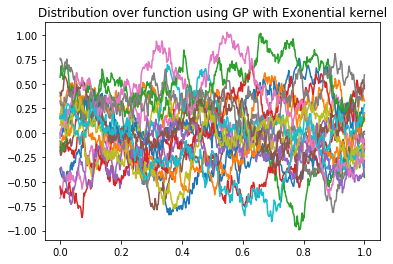

In [28]:
# Try in here!
np.random.seed(1) #난수 생성기 초기화 함수,

k = GPy.kern.Exponential(input_dim=1,lengthscale=0.2,variance=0.1)

X_ = np.linspace(0.,1.,500) # 500 points evenly spaced over [0,1]
X_ = X_[:,None] # reshape X to make it n*D
mu = np.zeros((500)) # vector of the means
C = k.K(X_,X_) # covariance matrix

# Generate 20 sample path with mean mu and covariance C
Y_samples = np.random.multivariate_normal(mu,C,20)

plt.title("Distribution over function using GP with Exonential kernel")
for i in range(20):
    plt.plot(X_[:],Y_samples[i,:])

### Define Observed data

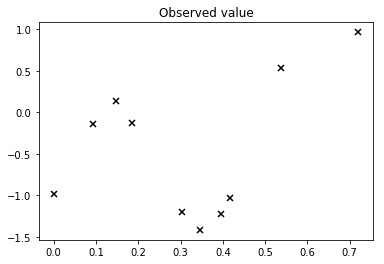

In [29]:
# 1. X will be 10 random numbers from uniform distribution.
# 2. Y will be -np.cos(np.piX) +np.sin(4np.piX) + np.random.randn(10,1)*0.05
# 3. Plot Observed data

# generate observed data
np.random.seed(1) #난수 생성기 초기화 함수,
X = np.random.uniform(0.,1.,10)[:,None]
Y = -np.cos(np.pi*X) +np.sin(4*np.pi*X) + np.random.randn(10,1)*0.05

plt.figure()
plt.title("Observed value")
plt.plot(X[:,:1],Y,'kx',mew=1.5)

### Build model with observed data and kernel

In [30]:
# 1. Build GP model with X,Y,Exponential kernel
m = GPy.models.GPRegression(X,Y,k)

### Plot GP model before optimization

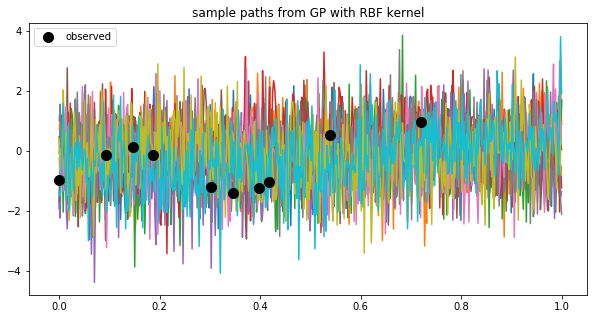

In [31]:
#1. Plot GP model
mu,C =m.predict(X_,full_cov=True)
Y_samples = np.random.multivariate_normal(mu.flatten(),C,15)
fig = plt.figure(figsize=(10,5))
plt.title("sample paths from GP with RBF kernel")
for i in range(10):
    plt.plot(X_[:],Y_samples[i,:])
plt.scatter(X,Y, color = "black",s=100,zorder=15,label="observed")
plt.legend()

### If needed, optimize GP model with Observed data. or you can also change kernel function to others.

GP_regression.,value,constraints,priors
Exponential.variance,0.750278560350303,+ve,
Exponential.lengthscale,0.2500210984164502,+ve,
Gaussian_noise.variance,4.118723093836526e-09,+ve,


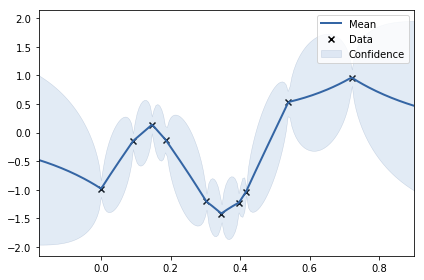

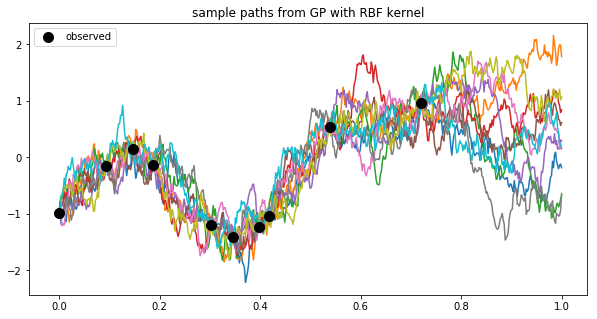

In [32]:
# 1. Optimize GP model to Observed data.
# 2. Plot Fitted GP model

# or You can change the kernel and see if improved!
m.constrain_positive('')
m.optimize()
m.plot()
display(m)

mu,C =m.predict(X_,full_cov=True)

Y_samples = np.random.multivariate_normal(mu.flatten(),C,10)
fig = plt.figure(figsize=(10,5))
plt.title("sample paths from GP with RBF kernel")
for i in range(10):
    plt.plot(X_[:],Y_samples[i,:])
plt.scatter(X,Y, color = "black",s=100,zorder=10,label="observed")
plt.legend()